In [2]:
import pandas as pd
data= pd.read_csv('banknote-authentication.csv')
data.head()

,wavelet_variance,wavelet_skewness,wavelet_curtosis,image_entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
y = data.pop('class')
print(y.shape)

(1372,)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,y, test_size=0.2,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1097, 4)
(275, 4)
(1097,)
(275,)


In [5]:
import numpy as np
N,p = data.shape
N_train = len(X_train)
N_test= len(X_test)
classes = np.unique(y)
print('Banknote_authentication has {} total samples and {} features'.format(N,p))
print('Train has {} sampels and test has {} sampels'.format(N_train,N_test))
print('Banknote-authentication has {} classes'.format(len(classes)))

Banknote_authentication has 1372 total samples and 4 features
Train has 1097 sampels and test has 275 sampels
Banknote-authentication has 2 classes


In [6]:
data.describe()

,wavelet_variance,wavelet_skewness,wavelet_curtosis,image_entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


Index(['wavelet_variance', 'wavelet_skewness', 'wavelet_curtosis',
       'image_entropy'],
      dtype='object')


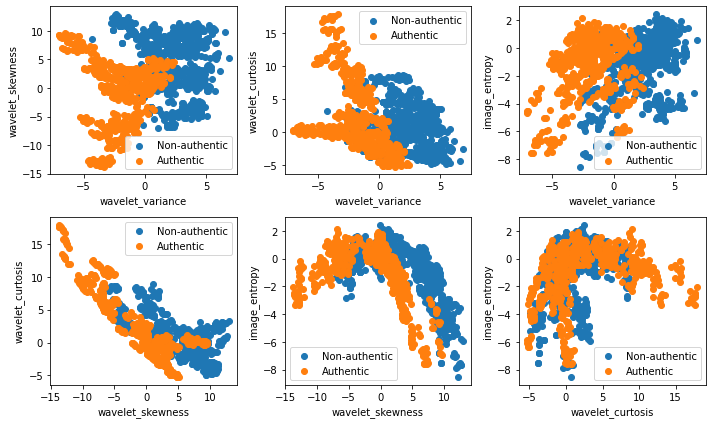

In [11]:
import matplotlib.pyplot as plt
f = data.columns
print(f)
indx=1

fig = plt.figure(figsize=(10,6))
for i in range(3):
    for j in range(i+1,4):
        ax = fig.add_subplot(2,3,indx)
        ax.scatter(data.loc[y==0,f[i]],data.loc[y==0,f[j]],label='Non-authentic')
        ax.scatter(data.loc[y==1,f[i]],data.loc[y==1,f[j]],label='Authentic')
        ax.set_xlabel(f[i])
        ax.set_ylabel(f[j])
        ax.legend()
        indx+=1
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

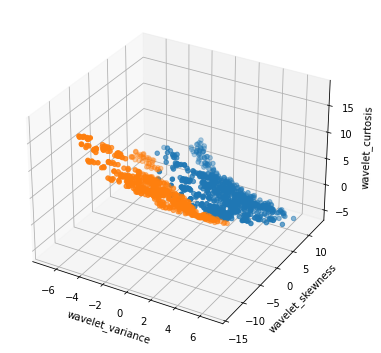

In [36]:
from mpl_toolkits.mplot3d import axes3d

f=data.columns
fig = plt.figure(figsize=(7,5))
ax = plt.axes(projection='3d')
ax.scatter(data.loc[y==0,f[0]],data.loc[y==0,f[1]],data.loc[y==0,f[2]],label='Non-authentic')
ax.scatter(data.loc[y==1,f[0]],data.loc[y==1,f[1]],data.loc[y==1,f[2]],label='Authentic')

ax.set_xlabel(f[0])
ax.set_ylabel(f[1])
ax.set_zlabel(f[2])

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

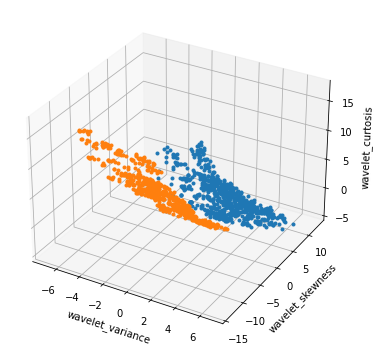

In [35]:
from mpl_toolkits.mplot3d import axes3d

f=data.columns
fig = plt.figure(figsize=(7,5))
ax = plt.axes(projection='3d')
plt.plot(data.loc[y==0,f[0]],data.loc[y==0,f[1]],data.loc[y==0,f[2]],'.',label='Non-authentic')
plt.plot(data.loc[y==1,f[0]],data.loc[y==1,f[1]],data.loc[y==1,f[2]],'.',label='Authentic')
ax.set_xlabel(f[0])
ax.set_ylabel(f[1])
ax.set_zlabel(f[2])
plt.tight_layout()
plt.show

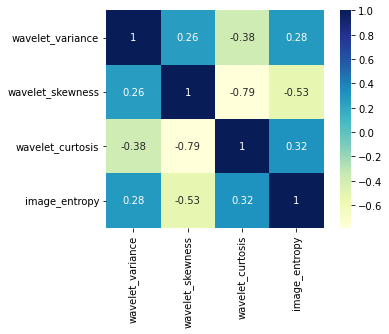

In [13]:
import seaborn as sns

plt.figure(figsize=(6,4))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu',square=True)
plt.show()

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [17]:
print(dtree.tree_.max_depth)

7


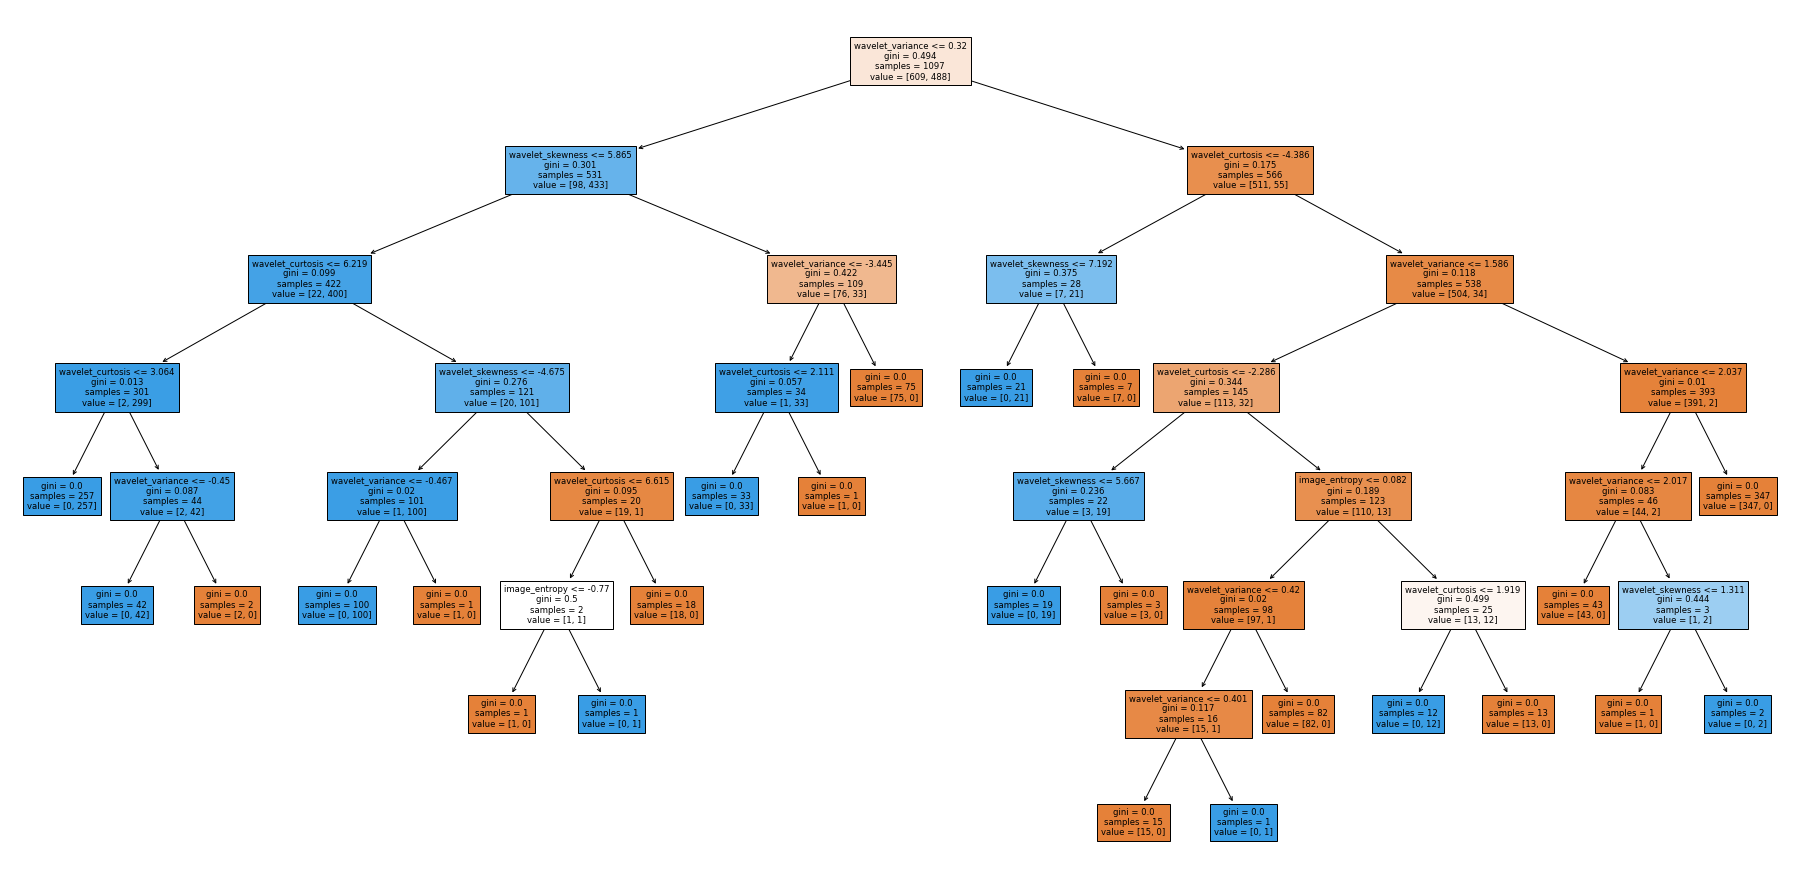

In [32]:
from sklearn.tree import plot_tree
plt.figure(figsize=(32,16))
plot_tree(dtree,feature_names= data.columns,filled=True,fontsize=8.5)
plt.show()

In [35]:
dtree_model_fixdepth= DecisionTreeClassifier(max_depth=4)
dtree_model_fixdepth.fit(X_train,Y_train)
print(dtree_model_fixdepth.tree_.max_depth)

4


In [37]:
training_acc = dtree.score(X_train, Y_train)
print("Training accuracy of the decision tree classifier = {:.4f}".format(training_acc))

Training accuracy of the decision tree classifier = 1.0000


In [38]:
test_acc = dtree.score(X_test,Y_test)
print("Testing accuracy of the decision tree classifier = {:.4f}".format(test_acc))

Testing accuracy of the decision tree classifier = 0.9782


In [52]:
from sklearn.metrics import precision_recall_fscore_support as prf
precision , recall , fscore, _ = prf(Y_test, dtree.predict(X_test), average='binary')
print("Precision {:.4f}, Recall {:.4f}, and F1 score {:.4f}".format(precision, recall, fscore))

Precision 0.9833, Recall 0.9672, and F1 score 0.9752


/Users/saharsoltanmohammadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

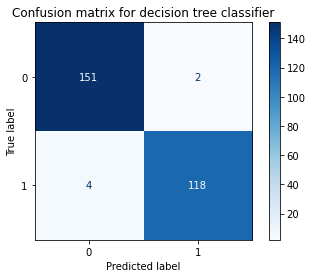

In [50]:
from sklearn.metrics import plot_confusion_matrix

plt.figure()
plot_confusion_matrix(dtree, X_test,Y_test,cmap=plt.cm.Blues, display_labels=[0,1])
plt.title('Confusion matrix for decision tree classifier')
plt.show()